<a href="https://colab.research.google.com/github/Leonel-Jeffrey/COMP-1827/blob/main/NN_01_LogisticRegression_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression with Keras

Welcome to your (possibly) first Machine Learning tutorial.

We will be using the Logistic Regression (a one-layer Neural Network) to recognise hand written digits in images.

The MNIST database of handwritten digits has been a benchmark in Computer Vision for many years. Although it is considered "solved" by many today, new algorithms are still tested on it first, and it still serves as a good learning tool.

More information on MNIST including results from prominent researchers in the field who developed a variety of models to improve classification accuracy:

> http://yann.lecun.com/exdb/mnist/

Quick intro to Jupyter controls:

> Select a cell and Ctrl+Enter - this will execute the selected cell. For more shortcuts, go to Help -> Keyboard Shortcuts

> Go through each cell and execute it to see the result

Useful links:

> https://en.wikipedia.org/wiki/Logistic_regression

## Import useful code packages

In [ ]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np

# Import Keras model layers
import keras
from keras.models import Sequential 
from keras.layers import Dense, Activation

## Load the MNIST Dataset

In [ ]:
# Import Keras model layers
import keras
import numpy as np
import tensorflow.keras as tk
from keras.models import Sequential 
from keras.layers import Dense, Activation

mnist = tk.datasets.mnist
# download and load the MNIST dataset - the file will be downloaded only once and saved in the Anaconda environment
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = mnist.load_data()

# Print shapes and bounds
print('Train set:')
print('Sizes:', X_train_raw.shape, y_train_raw.shape)

print('Test set:')
print('Sizes:', X_test_raw.shape, y_test_raw.shape)

print('Image values (min to max):', np.min(X_train_raw), 'to', np.max(X_train_raw))
print('Label values (min to max):', np.min(y_train_raw), 'to', np.max(y_train_raw))

Train set:
Sizes: (60000, 28, 28) (60000,)
Test set:
Sizes: (10000, 28, 28) (10000,)
Image values (min to max): 0 to 255
Label values (min to max): 0 to 9


## Normalisation

The data was loaded, but the pixel values are not suitable for learning with a Neural Network. Also, labels have to be in one-hot format.

* Divide raw image data in both training and test set by the maximum value

* Flatten the images into 1D vectors. Use NumPy's reshape function:
    https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

* Convert the raw numeric labels (0..9) to one-hot vectors - Keras has a builtin function to do just that:
    https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
    

In [ ]:
# Import Keras model layers
import keras
import numpy as np
import tensorflow as tf
import tensorflow.keras as tk
from keras.models import Sequential 
from keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical

# normalise raw image data by dividing by the maximum value
X_train = X_train_raw / 255 # normalise X_train
X_test = X_test_raw / 255 # normalise X_test

# flatten normalised data into 1D vectors
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# convert raw labels to one-hot vectors
y_train = tf.keras.utils.to_categorical(y_train_raw, num_classes=10) # convert y_train
y_test = tf.keras.utils.to_categorical(y_test_raw, num_classes=10) # convert y_test

# shuffle training samples (same permutation for X and Y so that labels still correspond)
np.random.seed(42) # fix random seed so that everyone has the same dataset permutation
permutation = np.random.permutation(X_train.shape[0])
X_train = X_train[permutation]
y_train = y_train[permutation]

# Print shapes and bounds
print('### Train set:')
print('Sizes:', X_train.shape, y_train.shape)
print('Image values (min to max):', np.min(X_train), 'to', np.max(X_train))
print('Label values (min to max):', np.min(y_train), 'to', np.max(y_train))
print('Total samples per class:', np.sum(y_train, axis=0))

print('### Test set:')
print('Sizes:', X_test.shape, y_test.shape)
print('Image values (min to max):', np.min(X_test), 'to', np.max(X_test))
print('Label values (min to max):', np.min(y_test), 'to', np.max(y_test))
print('Total samples per class:', np.sum(y_test, axis=0))

### Train set:
Sizes: (60000, 784) (60000, 10)
Image values (min to max): 0.0 to 1.0
Label values (min to max): 0.0 to 1.0
Total samples per class: [5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]
### Test set:
Sizes: (10000, 784) (10000, 10)
Image values (min to max): 0.0 to 1.0
Label values (min to max): 0.0 to 1.0
Total samples per class: [ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]


**Expected output:**

\### Train set:<br>
Sizes: (60000, 784) (60000, 10)<br>
Image values (min to max): 0.0 to 1.0<br>
Label values (min to max): 0.0 to 1.0<br>
Total samples per class: [5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]<br>
\### Test set:<br>
Sizes: (10000, 784) (10000, 10)<br>
Image values (min to max): 0.0 to 1.0<br>
Label values (min to max): 0.0 to 1.0<br>
Total samples per class: [ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]<br>

## Plot some samples

Change the index to see other samples

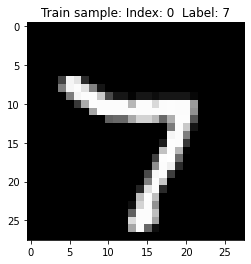

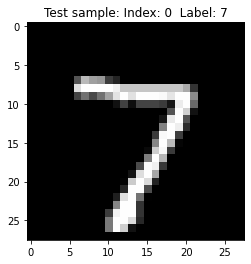

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Just a function to display a sample
def display_digit(index, xs, ys, title):
    label = np.argmax(ys[index]) # argmax used to convert from one-hot back to numeric label
    image = xs[index].reshape([28,28]) # make sure that the data is in 2D shape
    plt.title(title+': Index: %d  Label: %d' % (index, label))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

display_digit(index=0, xs=X_train, ys=y_train, title='Train sample') # display the first training example
display_digit(index=0, xs=X_test,  ys=y_test,  title='Test sample')  # display the first test example

That's right, the classes seem very easy to separate ! Let's prepare to train our algorithm.

## Define the model

We will build a neural network with a single layer:

* Use Kera's Dense to create a Fully Connected layer, use 'softmax' activation

![](./images/lr_diag.png "Logistic Regression")

In [ ]:

import tensorflow as tf
import tensorflow.keras as tk
import numpy as np
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD


# get input and output sizes
input_dim = X_train.shape[1] # 784
output_dim = y_train.shape[1] # 10

# Create Sequential model - this allows you to add layers one after the other to build your model
model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

# Compile model
optim = tf.keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


## Train the model

> **Note**: Be sure to rerun the previous cell before you train, otherwise previous weights will be kept - i.e. you would just train your model further.

In [ ]:
# settings
batch_size = 32
nb_epoch = 15

# train the model and save training history
history = model.fit(X_train, y_train,
          batch_size=batch_size, 
          epochs=nb_epoch, 
          verbose=1, 
          validation_split=1./6., # set 10K samples (out of 60K) aside for validation
)

# save model weights to file
model.save_weights('mnist_logistic_regression.h5')

Epoch 1/15
1563/1563 [==============================] - 4s 2ms/step - loss: 0.8201 - accuracy: 0.8073 - val_loss: 0.5310 - val_accuracy: 0.8640
Epoch 2/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4786 - accuracy: 0.8765 - val_loss: 0.4419 - val_accuracy: 0.8793
Epoch 3/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.4199 - accuracy: 0.8873 - val_loss: 0.4056 - val_accuracy: 0.8872
Epoch 4/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3908 - accuracy: 0.8939 - val_loss: 0.3835 - val_accuracy: 0.8924
Epoch 5/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3720 - accuracy: 0.8982 - val_loss: 0.3696 - val_accuracy: 0.8956
Epoch 6/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3591 - accuracy: 0.9012 - val_loss: 0.3587 - val_accuracy: 0.8996
Epoch 7/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.3491 - accuracy: 0.9036 - val_loss: 0.3514 - val_accuracy:

## Plot training behaviour

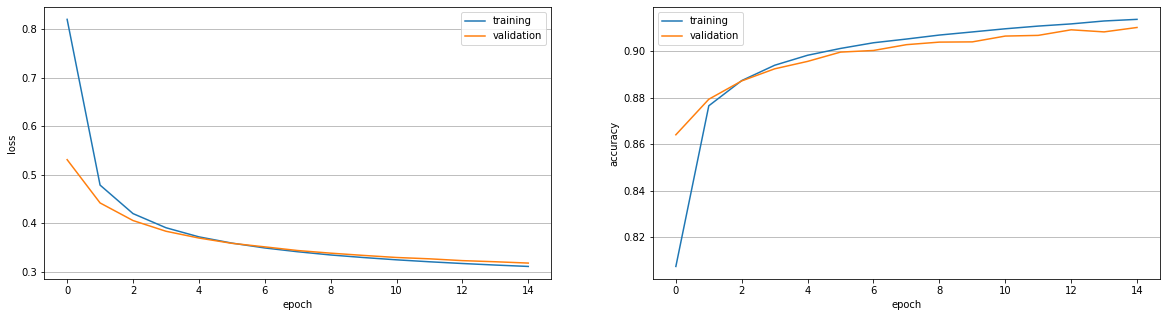

In [ ]:
# summarize history for loss and accuracy

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['training', 'validation'], loc='upper right')
ax1.yaxis.grid()

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['training', 'validation'], loc='upper left')
ax2.yaxis.grid()

plt.show()

## Evaluate the model on the test set

In [ ]:
# load model weights from file
model.load_weights('mnist_logistic_regression.h5')

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.3003654181957245
Test accuracy: 0.916700005531311


You should have obtained a value of around 0.91-0.92 (which means 91%-92% test accuracy). Congratulations !

## Try the following

1) Change the learning rate (e.g. 0.0001, 0.001, 0.01, 0.1) and observe the training curves

2) Add Momentum to the SGD optimizer (https://keras.io/optimizers/) and observe the accuracy

3) Change the batch size (e.g. 8, 16, 32, 64, 128, 256) and see what happens (time per epoch, accuracy, etc)

4) Try a different optimizer altogether (e.g. Adam) (https://keras.io/optimizers/)

5) Try adding shuffling during training (https://keras.io/models/sequential/)

6) Share your best results !